# 🎭 Ensemble Learning

---

## 🎯 **What is it?**
A machine learning technique that combines multiple models (weak learners) to create a stronger, more robust predictor. The core idea: "Wisdom of the crowd" - multiple models together often outperform individual models.

---

## 🧠 **Core Principle**

$$\text{Ensemble Prediction} = f(M_1, M_2, M_3, ..., M_n)$$

Where $M_i$ are individual models (base learners)

**Key Insight**: If individual models make different types of errors, combining them can reduce overall error.

---

## 🏗️ **Main Ensemble Strategies**

### 🗳️ **1. Voting**
> Combine predictions through voting mechanism

**Hard Voting (Classification):**
$$\hat{y} = \text{mode}(\hat{y_1}, \hat{y_2}, ..., \hat{y_n})$$

**Soft Voting (Classification):**
$$\hat{y} = \arg\max_c \frac{1}{n} \sum_{i=1}^{n} P_i(y=c)$$

**Averaging (Regression):**
$$\hat{y} = \frac{1}{n} \sum_{i=1}^{n} \hat{y_i}$$

### 🎯 **2. Bagging (Bootstrap Aggregating)**
> Train models on different subsets of data

**Process:**
1. Create $n$ bootstrap samples from training data
2. Train model on each sample
3. Combine predictions via voting/averaging

**Bootstrap Sample:**
$$\text{Sample}_i = \text{random sample with replacement from training data}$$

### 🚀 **3. Boosting**
> Sequential learning where models correct previous errors

**Process:**
1. Train model on original data
2. Focus on misclassified examples
3. Train next model with higher weights on errors
4. Repeat sequentially

---

## 🌲 **Popular Ensemble Methods**

### 🎲 **Random Forest** (Bagging)
> Multiple decision trees with random feature selection

**Key Features:**
- Bootstrap samples for each tree
- Random subset of features at each split
- Final prediction: majority vote (classification) or average (regression)

**Formula:**
$$\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$$

Where $B$ = number of trees, $T_b$ = individual tree

| Parameter | Effect | Typical Values |
|-----------|--------|----------------|
| `n_estimators` | Number of trees | 100-1000 |
| `max_features` | Features per split | 'sqrt', 'log2' |
| `max_depth` | Tree depth | 10-20 or None |

---

### ⚡ **Gradient Boosting** (Boosting)
> Sequential trees that minimize residual errors

**Algorithm:**
1. Start with initial prediction: $F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$
2. For each iteration $m$:
   - Compute residuals: $r_{im} = -\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}$
   - Fit tree to residuals: $h_m(x)$
   - Update: $F_m(x) = F_{m-1}(x) + \nu h_m(x)$

**Final Model:**
$$F(x) = F_0(x) + \nu \sum_{m=1}^{M} h_m(x)$$

Where $\nu$ = learning rate, $M$ = number of boosters

---

### 🎯 **AdaBoost** (Adaptive Boosting)
> Adjusts weights based on classification errors

**Weight Update:**
$$w_i^{(t+1)} = w_i^{(t)} \exp(\alpha_t \mathbb{I}(y_i \neq h_t(x_i)))$$

**Model Weight:**
$$\alpha_t = \frac{1}{2} \ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$$

Where $\epsilon_t$ = weighted error rate

---

### 🚄 **XGBoost** (Extreme Gradient Boosting)
> Optimized gradient boosting with regularization

**Objective Function:**
$$\text{Obj}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$$

**Regularization Term:**
$$\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2$$

Where $T$ = number of leaves, $w_j$ = leaf weights

---

## 📊 **Comparison Table**

| Method | Type | Speed | Accuracy | Interpretability | Overfitting Risk |
|--------|------|-------|----------|------------------|------------------|
| **Random Forest** | Bagging | Fast | High | Medium | Low |
| **Gradient Boosting** | Boosting | Medium | Very High | Low | Medium |
| **AdaBoost** | Boosting | Medium | High | Low | High |
| **XGBoost** | Boosting | Fast | Very High | Low | Low |
| **Voting** | Voting | Fast | Medium | High | Low |

---

## ✅ **Advantages**

```
✓ Reduces overfitting (especially bagging)
✓ Improves generalization
✓ Handles noise and outliers better
✓ Often achieves state-of-the-art performance
✓ Robust to individual model failures
✓ Can combine different algorithm types
```

## ❌ **Disadvantages**

```
✗ Increased computational complexity
✗ Less interpretable than single models
✗ Requires more memory
✗ Hyperparameter tuning becomes complex
✗ Can still overfit (especially boosting)
✗ Training time increases significantly
```

---

## 🛠️ **Implementation Strategy**

### 🎯 **Model Selection for Ensemble**
| Scenario | Recommended Method |
|----------|-------------------|
| **High Variance Problem** | Bagging (Random Forest) |
| **High Bias Problem** | Boosting (XGBoost, AdaBoost) |
| **Diverse Models Available** | Voting Ensemble |
| **Large Dataset** | Random Forest or XGBoost |
| **Small Dataset** | AdaBoost or Voting |

### 📈 **Hyperparameter Tuning Priority**
1. **Number of estimators** (`n_estimators`)
2. **Learning rate** (for boosting methods)
3. **Individual model parameters** (`max_depth`, `min_samples_split`)
4. **Regularization parameters** (for XGBoost)

---

## 💻 **Quick Implementation**

```python
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')

# Gradient Boosting  
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Voting Ensemble
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([
    ('rf', rf), ('gb', gb), ('svm', SVC(probability=True))
], voting='soft')

# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
```

---

## 🎪 **Use Cases**

- 🏆 **Kaggle Competitions**: XGBoost dominance
- 🏠 **Real Estate**: Random Forest for price prediction
- 📧 **Spam Detection**: AdaBoost for email classification
- 🛒 **Recommendation Systems**: Ensemble of collaborative filters
- 🏥 **Medical Diagnosis**: Voting ensemble for critical decisions

---

## 📋 **Best Practices**

| Practice | Why Important |
|----------|---------------|
| **Diverse Base Models** | Different error patterns |
| **Cross-validation** | Avoid overfitting in ensemble |
| **Feature Engineering** | Better base models = better ensemble |
| **Proper Validation** | Use holdout set for ensemble evaluation |
| **Computational Budget** | Balance performance vs. time |

---

> **💡 Pro Tip**: Start with Random Forest for baseline, then try XGBoost for performance boost. Consider stacking multiple ensemble methods for competition-level accuracy!

# 🤖 Bagging vs Boosting

## 🧠 Intuition

Both are **ensemble techniques** used to improve prediction performance by combining multiple weak learners.

| Technique | Core Idea |
|----------|-----------|
| **Bagging** | Train models **in parallel** on **different subsets** of data |
| **Boosting** | Train models **sequentially**, each correcting the previous one |

---

## 🧺 Bagging (Bootstrap Aggregating)

### ✅ Key Characteristics
- **Parallel training**
- Each model trained on a **random bootstrap sample** (sampling **with replacement**)
- Final prediction by **averaging** (regression) or **majority vote** (classification)
- Reduces **variance**

### 🔧 Steps
1. Generate $k$ bootstrap samples from dataset
2. Train a separate model (e.g., decision tree) on each sample
3. Aggregate predictions:

   - Regression:  
     $$ \hat{y} = \frac{1}{k} \sum_{i=1}^{k} \hat{y}^{(i)} $$
   - Classification:  
     Take majority vote

### 🌲 Example
- **Random Forest** = Bagging + Decision Trees + Random Feature Selection

---

## ⚡ Boosting

### ✅ Key Characteristics
- **Sequential training**
- Each model tries to **correct the errors** of the previous model
- Final prediction: **weighted sum** of weak learners
- Reduces **bias** (and also variance)

### 🔧 Steps (Generic)
1. Start with initial model $f_1$
2. At step $t$, train $f_t$ to predict **residuals/errors** of the previous model
3. Update model:

   $$
   F_t(x) = F_{t-1}(x) + \alpha f_t(x)
   $$

   where $\alpha$ is learning rate

### 📦 Examples
- **AdaBoost**: Adjusts **sample weights** to focus on misclassified points
- **Gradient Boosting**: Learns on **residuals**
- **XGBoost**, **LightGBM**, **CatBoost** are advanced boosting libraries

---

## ⚖️ Comparison Table

| Aspect            | Bagging                          | Boosting                         |
|------------------|----------------------------------|----------------------------------|
| Training         | Parallel                         | Sequential                       |
| Data Sampling    | Bootstrap (with replacement)     | Weighted, changes each round     |
| Focus            | Reduce variance                  | Reduce bias (and variance)       |
| Model Dependency | Independent learners             | Dependent learners               |
| Overfitting Risk | Lower                            | Higher (but controllable)        |
| Interpretability | Easier                           | Harder                           |
| Examples         | Random Forest                    | AdaBoost, Gradient Boosting, XGBoost |
| Final Prediction | Averaging/Voting                 | Weighted Sum                     |

---

## 📌 Use-Cases

| Situation                     | Use This        |
|------------------------------|-----------------|
| High variance (overfitting)  | Bagging         |
| High bias (underfitting)     | Boosting        |
| Want fast parallel training  | Bagging         |
| Need top performance         | Boosting (e.g., XGBoost) |

---

## 🔍 Visual Intuition

Imagine this:

### Bagging:
> Many people estimate house prices **independently**, and you take their **average**.

### Boosting:
> One expert estimates, next one **corrects** it, another improves further... finally you get a refined result.

---

## 🛠 Summary

| Feature            | Bagging                          | Boosting                         |
|--------------------|----------------------------------|----------------------------------|
| Purpose            | Variance reduction               | Bias + variance reduction        |
| Ensemble Type      | Parallel                         | Sequential                       |
| Model Influence    | Equal                            | Weighted                         |
| Training           | Independent                      | Depends on previous model        |

---



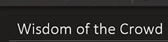

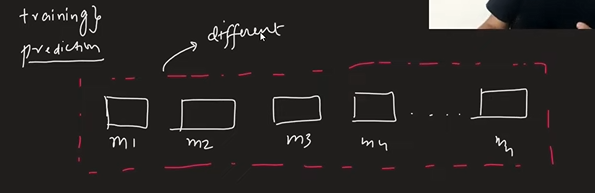

We need to ensure that all our models are different to get more perspectives about our data

In prediction for classification tasks we simply take the mode of the predictions of the different models

In predicition for regression task we take the mean of the predictions of the different models

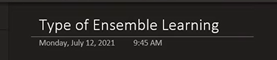

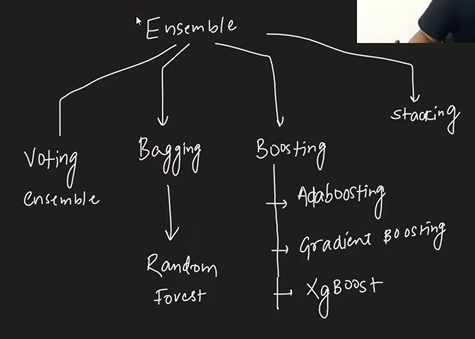
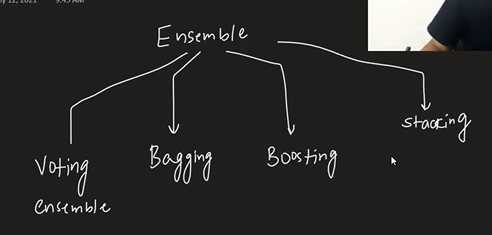

For ensemble learning we could either use different algorithms or we could use the same algorithms but train it on different subsets of the data

## Voting Ensemble

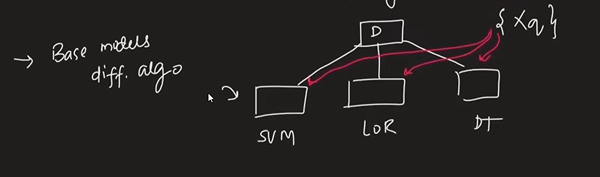

Use different algorithms on the same data

## Stacking

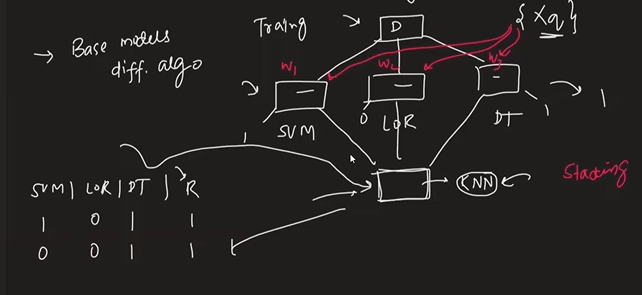

In stacking, we give the outputs of the models to kNN model in the end. This ensures we get different weights for different models unlike voting where each model has equal weight

## Bagging - Bootstrap Aggregation

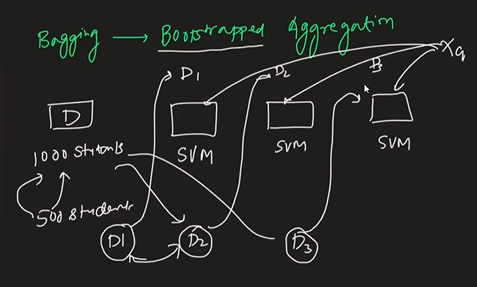

Give different data to the models by randomly sampling through the data

## Boosting

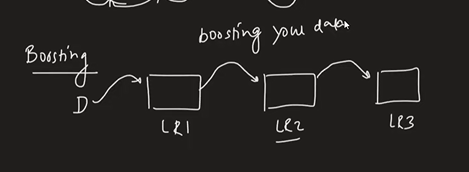

Here, we send the outputs of the models sequentially which corrects the mistakes of the previous models. This is the most powerful ensemble technique

## Why does ensemble learning work?

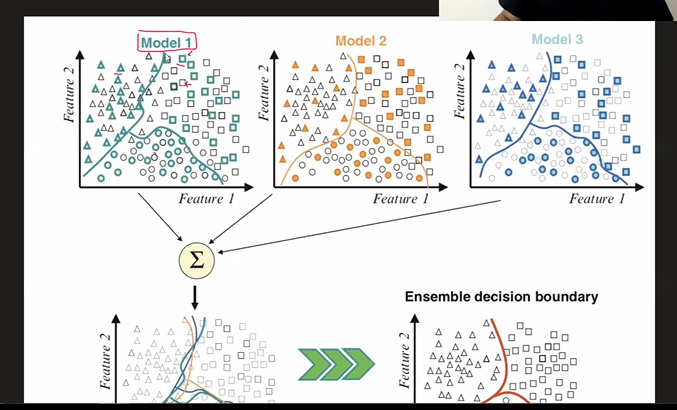

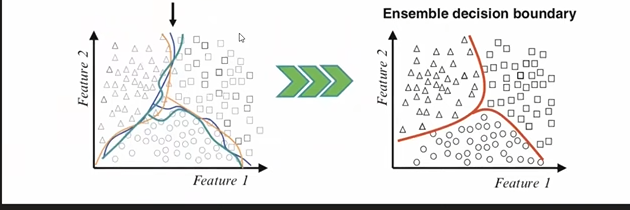

Ensemble learning basically removes the noise in the models prediction boundaries

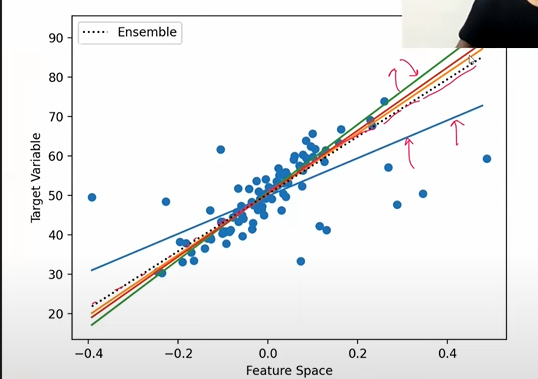

## Benefits of ensemble learning

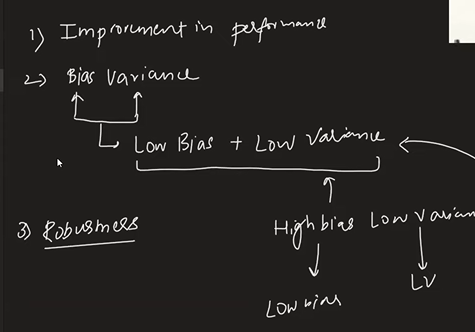

## When to use?

Use it always. It is very rare that ensemble learning doesn't improve performance